# Homework I 🔬🧪🥼🦠
Subject: Data Science for Engineering and Natural Sciences <br>
Lecturer: Franz Innerbichler

In [25]:
# requirements
from numpy.random import seed
from numpy.random import randn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Create a scatterplot
1) a normal sample (N=500) with mean 100 and sd 5 and
2) a normal sample (N=15) with mean 100 and sd 5 

In [26]:
# Sample sizes
N_large = 500
N_small = 15

# Mean and standard deviation
mu = 100
sigma = 5

# Generate normal samples
large_sample = np.random.normal(mu, sigma, N_large)
small_sample = np.random.normal(mu, sigma, N_small)

# Set a seed to reproduce the results
np.random.seed(42) 

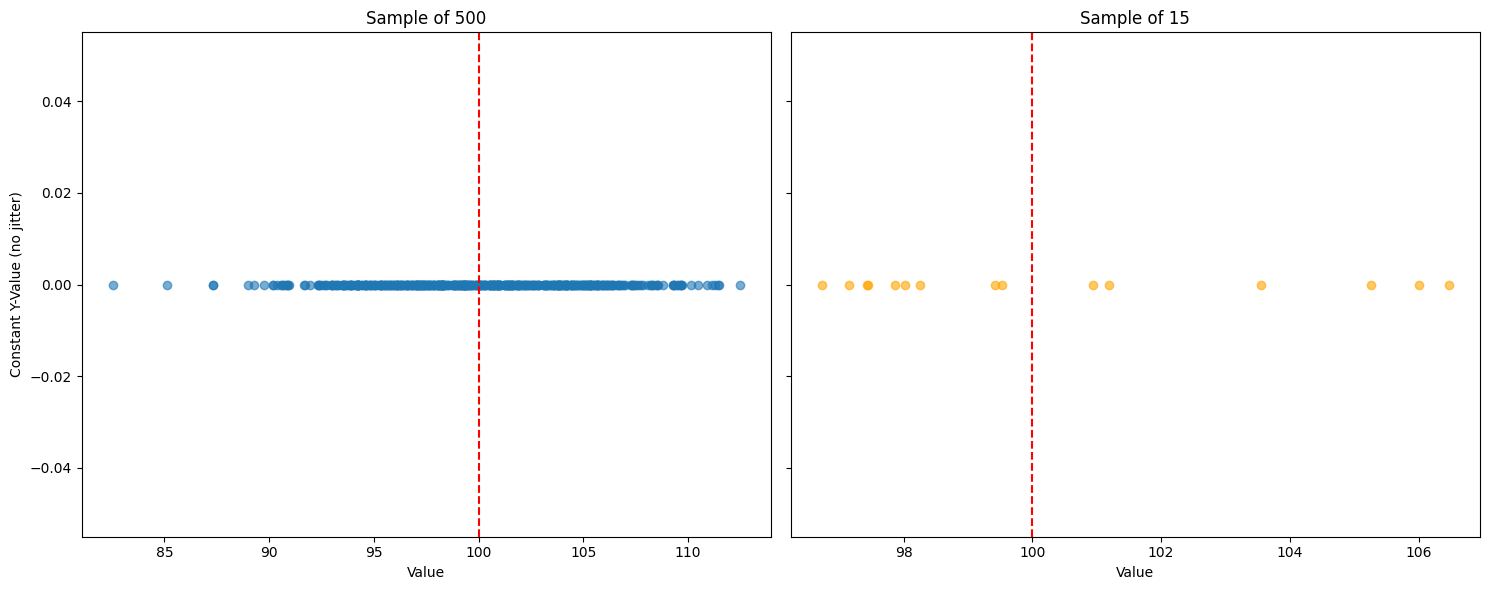

In [27]:
# PLOT
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Scatter plot for the large sample without jitter
axs[0].scatter(large_sample, [0]*N_large, alpha=0.6)  # y-values are all '0'
axs[0].set_title(f'Sample of {N_large}')
axs[0].axvline(x=mu, color='red', linestyle='--')  # mean line
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Constant Y-Value (no jitter)')

# Scatter plot for the small sample without jitter
axs[1].scatter(small_sample, [0]*N_small, alpha=0.6, color='orange')  # y-values are all '0'
axs[1].set_title(f'Sample of {N_small}')
axs[1].axvline(x=mu, color='red', linestyle='--')  # mean line
axs[1].set_xlabel('Value')

# Adjusting the layout and showing the plot
plt.tight_layout()
plt.show()


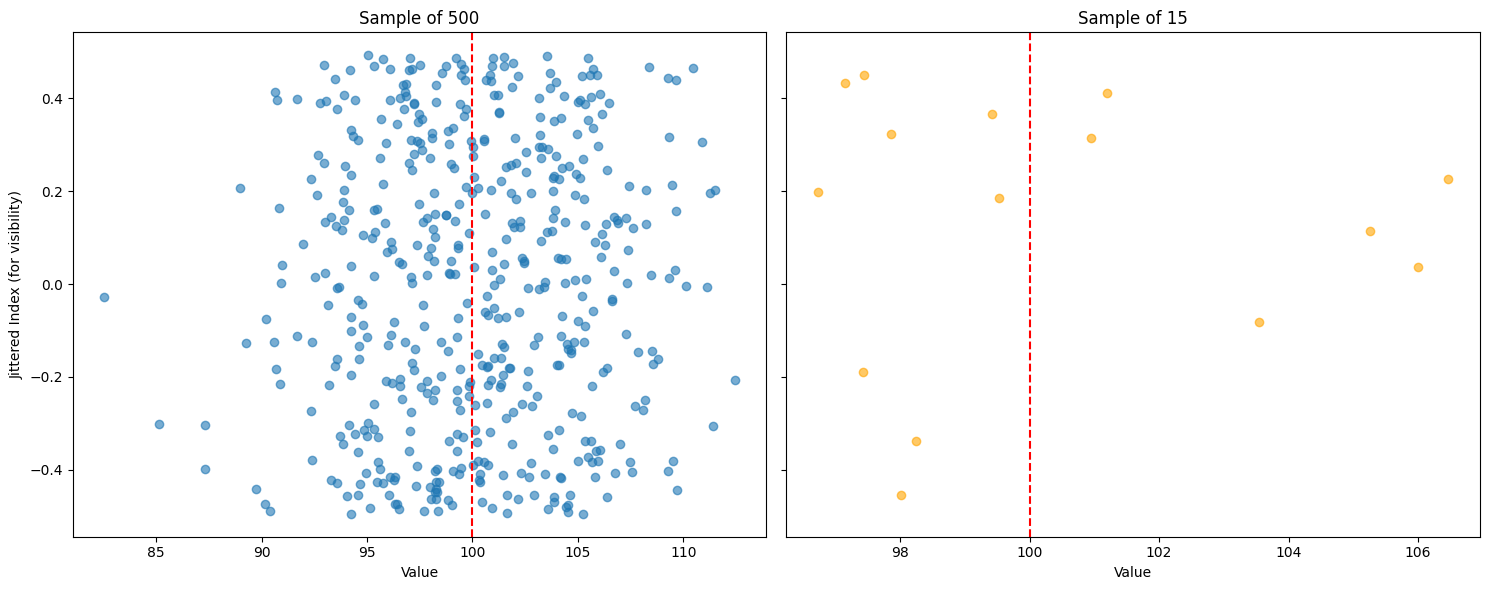

In [28]:
# For visibility, we add a small random "jitter" to the y-values because 
# scatter plots require two dimensions and here we are technically dealing 
# with only one dimension (x-axis values). We simulate the y-axis values 
# (all points would have a single y-value without jitter, making it a line).
jitter_large = np.random.random(N_large) - 0.5  # values between -0.5 and 0.5
jitter_small = np.random.random(N_small) - 0.5

# Creating a figure with two subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # 'sharey=True' makes the y-axes identical

# Scatter plot for the large sample
axs[0].scatter(large_sample, jitter_large, alpha=0.6)
axs[0].set_title(f'Sample of {N_large}')
axs[0].axvline(x=mu, color='red', linestyle='--')  # mean line
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Jittered Index (for visibility)')

# Scatter plot for the small sample
axs[1].scatter(small_sample, jitter_small, alpha=0.6, color='orange')
axs[1].set_title(f'Sample of {N_small}')
axs[1].axvline(x=mu, color='red', linestyle='--')  # mean line
axs[1].set_xlabel('Value')

# Adjusting the layout and showing the plot
plt.tight_layout()
plt.show()

##### 2. estimate the difference in spread (maximum to minimum) in sd‘s

In [29]:
# Calculating the range for each sample (max - min)
range_large = np.max(large_sample) - np.min(large_sample)
range_small = np.max(small_sample) - np.min(small_sample)

# Converting the range into the number of standard deviations
num_sd_large = range_large / sigma
num_sd_small = range_small / sigma

# The difference in spread in terms of the number of standard deviations
difference_in_spread = num_sd_large - num_sd_small

print(f"Large sample range: {range_large:.2f} (or {num_sd_large:.2f} SDs)")
print(f"Small sample range: {range_small:.2f} (or {num_sd_small:.2f} SDs)")
print(f"Difference in spread: {difference_in_spread:.2f} SDs")

Large sample range: 29.92 (or 5.98 SDs)
Small sample range: 9.74 (or 1.95 SDs)
Difference in spread: 4.04 SDs


#### 3) simulate sufficient samples of the 2 sample sizes and calculate the difference between the 2 groups in min-max ranges

In [30]:
num_simulations = 1000  # Number of simulations - set as required

# Store information about the ranges
differences_in_ranges = []

for _ in range(num_simulations):
    # Generate samples
    large_sample = np.random.normal(mu, sigma, N_large)
    small_sample = np.random.normal(mu, sigma, N_small)
    
    # Calculate ranges
    range_large = np.max(large_sample) - np.min(large_sample)
    range_small = np.max(small_sample) - np.min(small_sample)
    
    # Calculate the difference in range
    difference = range_large - range_small
    
    # Store the difference
    differences_in_ranges.append(difference)

# Convert the results to a NumPy array for easier analysis
differences_array = np.array(differences_in_ranges)

# Calculate and print summary statistics
print(f"Mean difference in range: {np.mean(differences_array)}")
print(f"Standard deviation of differences: {np.std(differences_array)}")
print(f"Maximum difference observed: {np.max(differences_array)}")
print(f"Minimum difference observed: {np.min(differences_array)}")


Mean difference in range: 12.929838547441864
Standard deviation of differences: 4.604013398999222
Maximum difference observed: 26.149924137579873
Minimum difference observed: -4.761108430198618


#### 4. justify how you calculated it
* Running a specified number of simulations where we generate new samples for each group.
* Calculating the range of values (max - min) for each sample.
* Calculating the difference in ranges between the two groups for each simulation.
* Storing these differences in a list.
* After running the simulations, we are converting the list to a NumPy array for easier calculation of statistical measures.
* Printing out some basic summary statistics about these differences.



#### 5. What is the difference? How can scatterplots mislead in estimating the variability?

Variability due to Sample Size: The smaller sample (N=15) is much more susceptible to variability due to random chance than the larger sample (N=500). Because of the larger sample size, the range of the larger sample is more likely to be closer to the true range of the entire population from which the sample is drawn. In contrast, the range of the smaller sample can vary more significantly from one sample to another because each individual point has a much larger influence on the calculated range.

Mean Difference in Range: If the mean difference in range is positive, it generally indicates that the larger sample tends to have a larger range than the smaller one. This happens because a larger sample is more likely to capture the extremes of the entire population. If the mean difference is zero or negative, it could indicate that there's no systematic difference in the range captured by the two sample sizes or that the smaller sample size is capturing a larger range due to high variability in the extremes it's capturing.

Standard Deviation of Differences: This metric tells you about the consistency of the differences in range between the two sample sizes. A smaller standard deviation indicates that the difference in range between the two sample sizes is quite consistent across different simulations. A larger standard deviation indicates that this difference is highly variable.

Maximum and Minimum Difference Observed: These values show the extremes of differences recorded in your simulations. They are crucial for understanding the potential variability in the differences between sample ranges.

In essence, these differences are highlighting how sample size impacts the reliability of your statistical estimates. Larger samples will generally provide a more accurate reflection of the true population parameters (such as the range) because they are less influenced by extreme values or outliers. This simulation exercise helps quantify how much of a difference the sample size can make in the estimation of range, providing empirical evidence to support statistical theory.

It's important to note that while the larger sample tends to provide a better estimate of the population parameters, it's not about one sample being "better" than the other; it's about understanding the limitations and variability inherent in working with samples of different sizes.